<a href="https://colab.research.google.com/github/Pavan-Nagulla/Smart-Attendance-System/blob/main/DL_Project_5_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:02<00:00, 72.3MB/s]
100% 163M/163M [00:02<00:00, 61.0MB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1975.jpg', 'with_mask_3016.jpg', 'with_mask_558.jpg', 'with_mask_2202.jpg', 'with_mask_3544.jpg']
['with_mask_2254.jpg', 'with_mask_2447.jpg', 'with_mask_2890.jpg', 'with_mask_565.jpg', 'with_mask_855.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1821.jpg', 'without_mask_2376.jpg', 'without_mask_458.jpg', 'without_mask_2326.jpg', 'without_mask_33.jpg']
['without_mask_858.jpg', 'without_mask_1648.jpg', 'without_mask_1917.jpg', 'without_mask_621.jpg', 'without_mask_3367.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [11]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

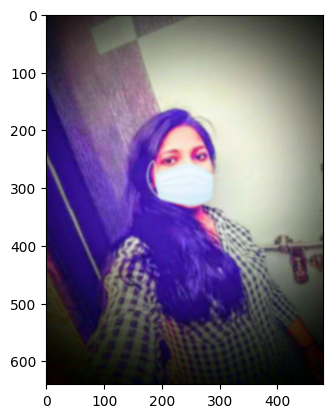

In [18]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1975.jpg')
imgplot = plt.imshow(img)
plt.show()

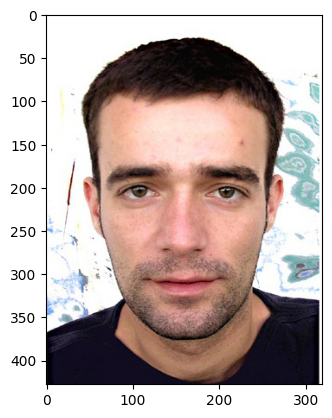

In [23]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_621.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [24]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
type(data)

list

In [26]:
len(data)

7553

In [27]:
data[0]

array([[[11, 10, 16],
        [11, 10, 16],
        [10,  9, 15],
        ...,
        [20, 25, 18],
        [18, 23, 16],
        [17, 22, 15]],

       [[11, 10, 16],
        [12, 11, 17],
        [12, 11, 17],
        ...,
        [21, 26, 19],
        [19, 24, 17],
        [18, 23, 16]],

       [[11, 10, 16],
        [13, 12, 18],
        [14, 13, 19],
        ...,
        [23, 28, 21],
        [22, 27, 20],
        [20, 25, 18]],

       ...,

       [[ 5,  0,  0],
        [ 8,  1,  0],
        [10,  0,  0],
        ...,
        [16,  0,  2],
        [12,  0,  1],
        [ 4,  2,  0]],

       [[ 9,  0,  0],
        [10,  0,  0],
        [12,  0,  0],
        ...,
        [ 9,  0,  0],
        [16,  0,  2],
        [16,  0,  3]],

       [[11,  0,  0],
        [12,  0,  0],
        [13,  0,  0],
        ...,
        [ 1,  1,  0],
        [ 4,  1,  0],
        [ 9,  0,  1]]], dtype=uint8)

In [28]:
type(data[0])

numpy.ndarray

In [29]:
data[0].shape

(128, 128, 3)

In [30]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [31]:
type(X)

numpy.ndarray

In [32]:
type(Y)

numpy.ndarray

In [33]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [34]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [37]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [38]:
X_train[0]

array([[[182, 182, 145],
        [181, 181, 144],
        [182, 182, 144],
        ...,
        [184, 195, 178],
        [191, 202, 185],
        [190, 199, 181]],

       [[182, 182, 144],
        [182, 182, 144],
        [180, 180, 142],
        ...,
        [165, 176, 160],
        [177, 188, 171],
        [173, 182, 165]],

       [[181, 182, 143],
        [182, 182, 144],
        [180, 180, 142],
        ...,
        [138, 149, 133],
        [149, 160, 143],
        [160, 168, 153]],

       ...,

       [[167, 169, 164],
        [146, 148, 143],
        [ 40,  42,  37],
        ...,
        [ 14,  13,   7],
        [ 11,  10,   6],
        [ 10,   9,   4]],

       [[101, 103,  98],
        [158, 160, 155],
        [143, 145, 140],
        ...,
        [ 13,  12,   7],
        [ 11,  10,   6],
        [ 11,  10,   6]],

       [[ 78,  80,  75],
        [126, 128, 123],
        [179, 181, 176],
        ...,
        [ 13,  12,   8],
        [ 12,  11,   7],
        [ 12,  11,   6]]

In [39]:
X_train_scaled[0]

array([[[0.71372549, 0.71372549, 0.56862745],
        [0.70980392, 0.70980392, 0.56470588],
        [0.71372549, 0.71372549, 0.56470588],
        ...,
        [0.72156863, 0.76470588, 0.69803922],
        [0.74901961, 0.79215686, 0.7254902 ],
        [0.74509804, 0.78039216, 0.70980392]],

       [[0.71372549, 0.71372549, 0.56470588],
        [0.71372549, 0.71372549, 0.56470588],
        [0.70588235, 0.70588235, 0.55686275],
        ...,
        [0.64705882, 0.69019608, 0.62745098],
        [0.69411765, 0.7372549 , 0.67058824],
        [0.67843137, 0.71372549, 0.64705882]],

       [[0.70980392, 0.71372549, 0.56078431],
        [0.71372549, 0.71372549, 0.56470588],
        [0.70588235, 0.70588235, 0.55686275],
        ...,
        [0.54117647, 0.58431373, 0.52156863],
        [0.58431373, 0.62745098, 0.56078431],
        [0.62745098, 0.65882353, 0.6       ]],

       ...,

       [[0.65490196, 0.6627451 , 0.64313725],
        [0.57254902, 0.58039216, 0.56078431],
        [0.15686275, 0

**Building a Convolutional Neural Networks (CNN)**

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [42]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [43]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 22ms/step - loss: 0.4697 - acc: 0.7947 - val_loss: 0.2743 - val_acc: 0.8893
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2986 - acc: 0.8828 - val_loss: 0.2546 - val_acc: 0.8926
Epoch 3/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2521 - acc: 0.9009 - val_loss: 0.2127 - val_acc: 0.9091
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2071 - acc: 0.9194 - val_loss: 0.1954 - val_acc: 0.9174
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1946 - acc: 0.9239 - val_loss: 0.2375 - val_acc: 0.9041


**Model Evaluation**

In [45]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2667 - acc: 0.8974
Test Accuracy = 0.8974189162254333


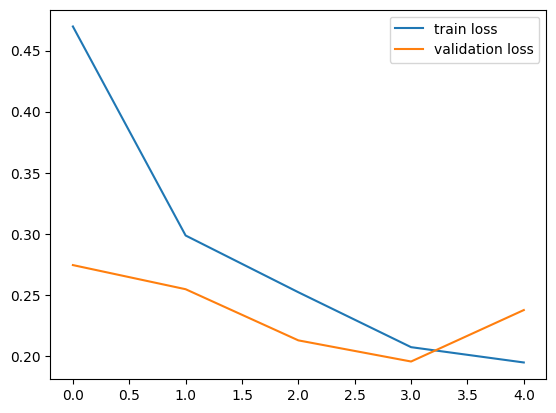

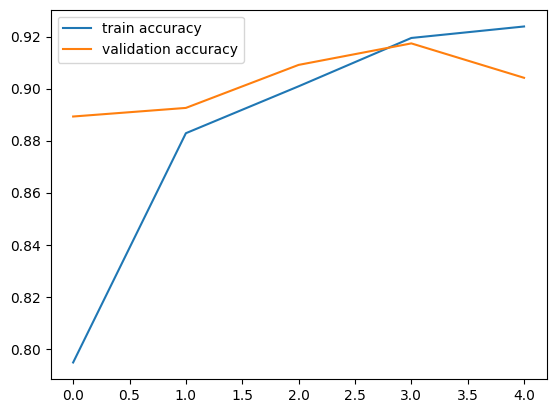

In [46]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1.jpg


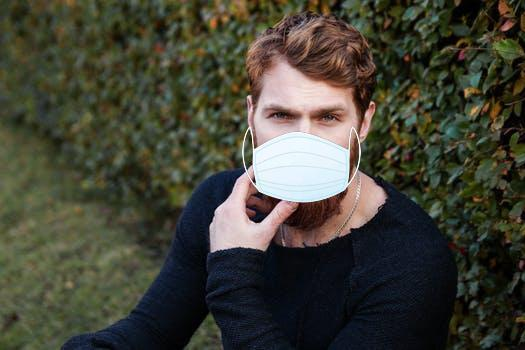

1/1 [==============================] - 0s 35ms/step
[[0.44847843 0.48850662]]
1
The person in the image is wearing a mask


In [53]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')